In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pulp
import sys
import os
import importlib.util
import importlib
import gurobipy as gp

# モジュールを強制的に再ロード（古いキャッシュをクリア）
if 'code' in sys.modules:
    del sys.modules['code']
# サブモジュールも削除
for module_name in list(sys.modules.keys()):
    if module_name.startswith('code.'):
        del sys.modules[module_name]

current_dir = os.getcwd()
spec = importlib.util.spec_from_file_location("code", os.path.join(current_dir, "code", "__init__.py"))
code_module = importlib.util.module_from_spec(spec)
sys.modules["code"] = code_module
spec.loader.exec_module(code_module)

# サブモジュールも再ロード
importlib.reload(code_module)

make_tensor_grid_2d = code_module.make_tensor_grid_2d
make_tensor_grid_3d = code_module.make_tensor_grid_3d
product_beta_density = code_module.product_beta_density
mixture_beta_pdf = code_module.mixture_beta_pdf
solve_mechanism = code_module.solve_mechanism
solve_mechanism_iterative = code_module.solve_mechanism_iterative
solve_dual = code_module.solve_dual
discretize_signed_measure = code_module.discretize_signed_measure
build_cost_matrix = code_module.build_cost_matrix
classify_region = code_module.classify_region
plot_polyhedral_regions = code_module.plot_polyhedral_regions
save_results = code_module.save_results
load_results = code_module.load_results

print("モジュールを再ロードしました（混合ベータ分布対応版）")

モジュールを再ロードしました（混合ベータ分布対応版）


In [17]:
home_license = os.path.expanduser('~/gurobi.lic')
os.environ['GRB_LICENSE_FILE'] = home_license

SOLVER = pulp.GUROBI(msg=True)

# ケース1


#types = 15625
重みの合計: 1.000000


/var/folders/my/j3wjhgx94rscj7c09g72009c0000gn/T/ipykernel_25631/1686571669.py:36: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/my/j3wjhgx94rscj7c09g72009c0000gn/T/ipykernel_25631/1686571669.py:36: UserWarning: Glyph 12490 (\N{KATAKANA LETTER NA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/my/j3wjhgx94rscj7c09g72009c0000gn/T/ipykernel_25631/1686571669.py:36: UserWarning: Glyph 12472 (\N{KATAKANA LETTER ZI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/my/j3wjhgx94rscj7c09g72009c0000gn/T/ipykernel_25631/1686571669.py:36: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/my/j3wjhgx94rscj7c09g72009c0000gn/T/ipykernel_25631/1686571669.py:36: UserWarning: Glyph 23494 (\N{CJK UNIFIED IDEOGRAPH-5BC6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/my/j3wjhgx94rscj7c0

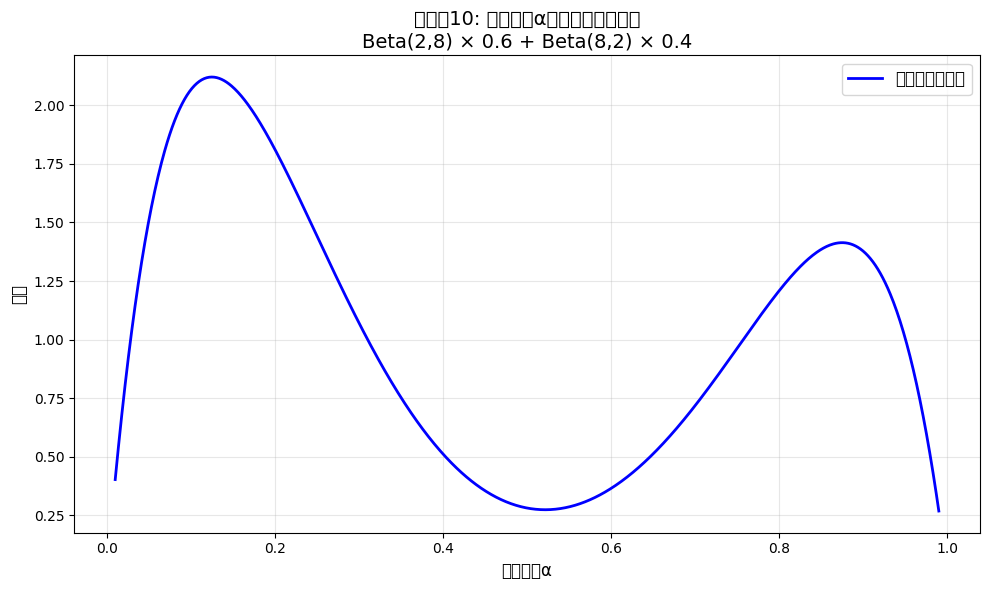

In [ ]:
# ケース1: 財a, 財b, シナジーはBeta(1,1)
NX, NY, NZ = 25, 25, 25
BETA_PARAMS = [
    (1.0, 1.0),
    (1.0, 1.0),
    (1.0, 1.0),
]

points, weights = make_tensor_grid_3d(NX, NY, NZ, BETA_PARAMS)
print(f"#types = {len(points)}")


In [ ]:
status, obj_val, u_sol, p_sol, n_iter = solve_mechanism_iterative(
    points, weights, grid_sizes=(NX, NY, NZ), solver=SOLVER
)

print("LP status:", status)
print("Optimal revenue:", obj_val)
print(f"Number of iterations: {n_iter}")

# 結果を保存
filepath_case1 = save_results(
    points, weights, u_sol, p_sol, obj_val, status,
    grid_sizes=(NX, NY, NZ),
    n_iter=n_iter,
    filename="results_case1.npz"
)


In [ ]:
# 保存されたデータから読み込んで可視化
data = load_results("data/results_case1.npz")
plot_polyhedral_regions(
    data['points'], data['p_sol'], data['p_sol'][2, :],
    title="Allocation Regions - Case 1 (from saved data)\n(Beta(1,1) × Beta(1,1) × Beta(1,1))"
)


FileNotFoundError: [Errno 2] No such file or directory: 'data/results_case10.npz'

# ケース2


#types = 15625
重みの合計: 1.000000


/var/folders/my/j3wjhgx94rscj7c09g72009c0000gn/T/ipykernel_25631/1040105871.py:37: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/my/j3wjhgx94rscj7c09g72009c0000gn/T/ipykernel_25631/1040105871.py:37: UserWarning: Glyph 12490 (\N{KATAKANA LETTER NA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/my/j3wjhgx94rscj7c09g72009c0000gn/T/ipykernel_25631/1040105871.py:37: UserWarning: Glyph 12472 (\N{KATAKANA LETTER ZI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/my/j3wjhgx94rscj7c09g72009c0000gn/T/ipykernel_25631/1040105871.py:37: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/my/j3wjhgx94rscj7c09g72009c0000gn/T/ipykernel_25631/1040105871.py:37: UserWarning: Glyph 23494 (\N{CJK UNIFIED IDEOGRAPH-5BC6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/my/j3wjhgx94rscj7c0

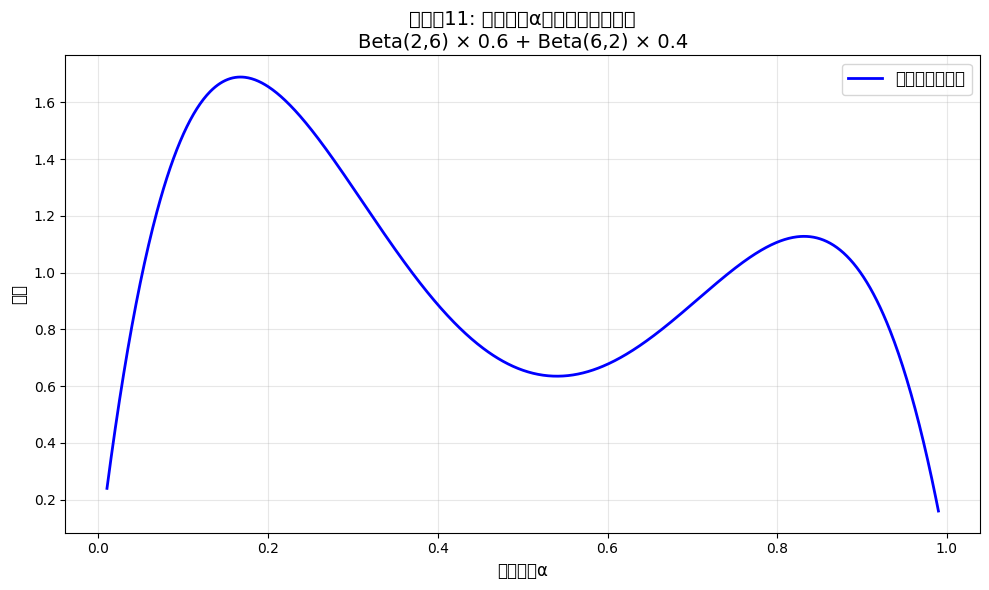

In [ ]:
# ケース2: 財a, 財bはBeta(1,1)、シナジーαはU[-1,0]
NX2, NY2, NZ2 = 25, 25, 25
BETA_PARAMS_MIXED = [
    {'type': 'beta', 'params': (1.0, 1.0), 'range': (0, 1)},
    {'type': 'beta', 'params': (1.0, 1.0), 'range': (0, 1)},
    {'type': 'uniform', 'range': (-1, 0)},
]


In [ ]:
points2, weights2 = make_tensor_grid_3d(NX2, NY2, NZ2, BETA_PARAMS_MIXED)
print(f"#types = {len(points2)}")
print("ex. first point, weight =", points2[0], weights2[0])

status2, obj_val2, u_sol2, p_sol2, n_iter2 = solve_mechanism_iterative(
    points2, weights2, grid_sizes=(NX2, NY2, NZ2), solver=SOLVER
)

print("LP status:", status2)
print("Optimal revenue:", obj_val2)
print(f"Number of iterations: {n_iter2}")

# 結果を保存
filepath_case2 = save_results(
    points2, weights2, u_sol2, p_sol2, obj_val2, status2,
    grid_sizes=(NX2, NY2, NZ2),
    n_iter=n_iter2,
    filename="results_case2.npz"
)


Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2749041
Academic license 2749041 - for non-commercial use only - registered to ko___@u.northwestern.edu
Gurobi Optimizer version 13.0.0 build v13.0.0rc1 (mac64[arm] - Darwin 25.1.0 25B78)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Academic license 2749041 - for non-commercial use only - registered to ko___@u.northwestern.edu
Optimize a model with 136875 rows, 62500 columns and 379375 nonzeros (Max)
Model fingerprint: 0x02e745d7
Model has 62500 linear objective coefficients
Coefficient statistics:
  Matrix range     [4e-02, 1e+00]
  Objective range  [4e-07, 1e-04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 7 rows and 0 columns
Presolve time: 0.15s
Presolved: 136868 rows, 62500 columns, 379410 nonzeros

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Ordering time

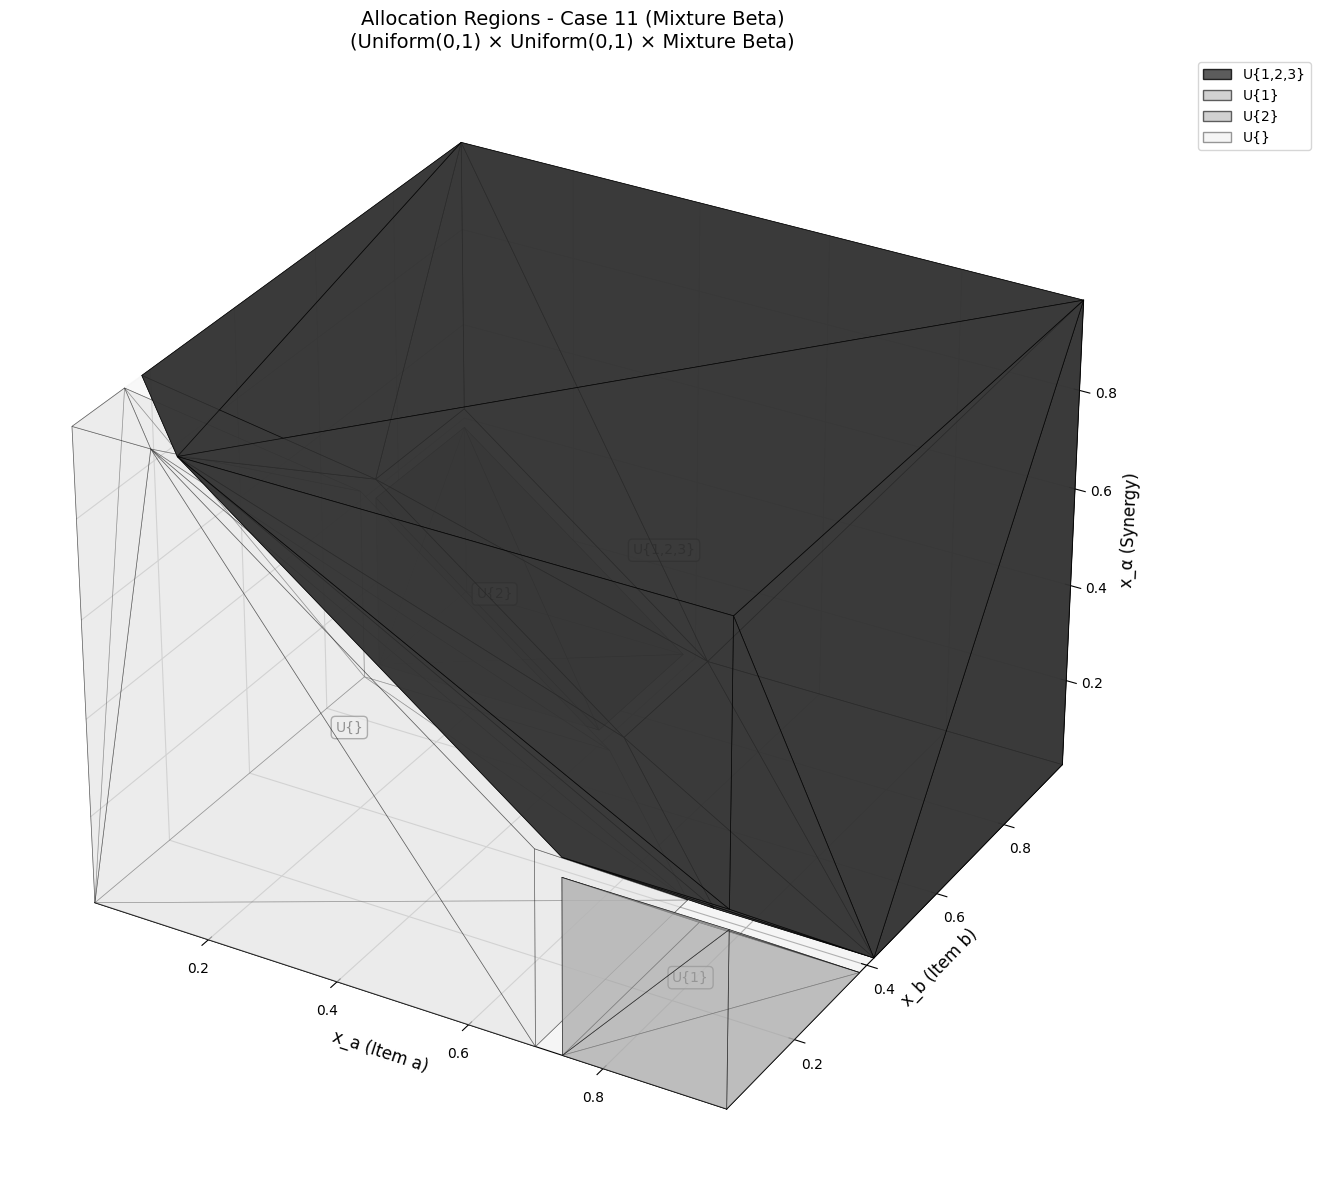

領域の統計:
  U{1,2,3}: 11245 点
  U{1}: 385 点
  U{2}: 385 点
  U{}: 3610 点


In [ ]:
# 保存されたデータから読み込んで可視化
data = load_results("data/results_case2.npz")
plot_polyhedral_regions(
    data['points'], data['p_sol'], data['p_sol'][2, :],
    title="Allocation Regions - Case 2 (from saved data)\n(Beta(1,1) × Beta(1,1) × U[-1,0])"
)


# ケース3

In [ ]:
# ケース3: 財a, 財bはBeta(1,1)、シナジーαはU[-1,1]
NX3, NY3, NZ3 = 25, 25, 50
BETA_PARAMS_MIXED = [
    {'type': 'beta', 'params': (1.0, 1.0), 'range': (0, 1)},
    {'type': 'beta', 'params': (1.0, 1.0), 'range': (0, 1)},
    {'type': 'uniform', 'range': (-1, 1)},
]

#types = 15625


In [ ]:
points3, weights3 = make_tensor_grid_3d(NX3, NY3, NZ3, BETA_PARAMS_MIXED)
print(f"#types = {len(points3)}")
print("ex. first point, weight =", points3[0], weights3[0])

status3, obj_val3, u_sol3, p_sol3, n_iter3 = solve_mechanism_iterative(
    points3, weights3, grid_sizes=(NX3, NY3, NZ3), solver=SOLVER
)

print("LP status:", status3)
print("Optimal revenue:", obj_val3)
print(f"Number of iterations: {n_iter3}")

# 結果を保存
filepath_case3 = save_results(
    points3, weights3, u_sol3, p_sol3, obj_val3, status3,
    grid_sizes=(NX3, NY3, NZ3),
    n_iter=n_iter3,
    filename="results_case3.npz"
)


Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2749041
Academic license 2749041 - for non-commercial use only - registered to ko___@u.northwestern.edu
Gurobi Optimizer version 13.0.0 build v13.0.0rc1 (mac64[arm] - Darwin 25.1.0 25B78)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Academic license 2749041 - for non-commercial use only - registered to ko___@u.northwestern.edu
Optimize a model with 136875 rows, 62500 columns and 379375 nonzeros (Max)
Model fingerprint: 0x44a48239
Model has 62500 linear objective coefficients
Coefficient statistics:
  Matrix range     [4e-02, 1e+00]
  Objective range  [1e-06, 6e-05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 7 rows and 0 columns
Presolve time: 0.10s
Presolved: 136868 rows, 62500 columns, 379410 nonzeros

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Ordering time

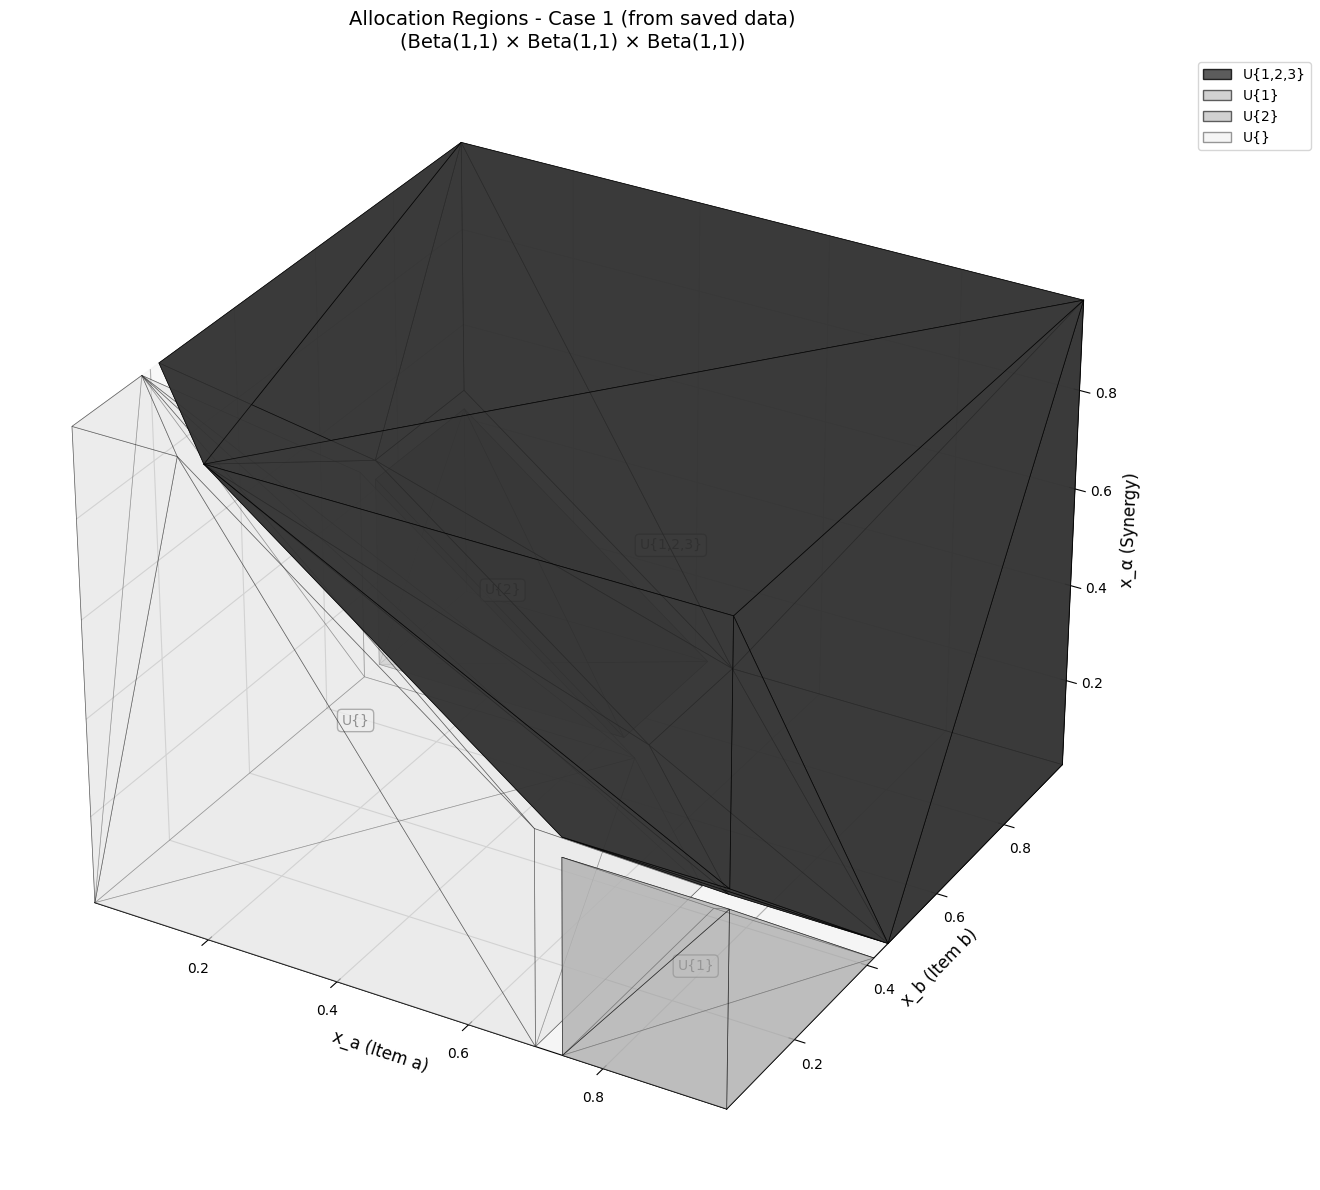

領域の統計:
  U{1,2,3}: 10798 点
  U{1}: 462 点
  U{2}: 462 点
  U{}: 3903 点


In [ ]:
# 保存されたデータから読み込んで可視化
data = load_results("data/results_case3.npz")
plot_polyhedral_regions(
    data['points'], data['p_sol'], data['p_sol'][2, :],
    title="Allocation Regions - Case 3 (from saved data)\n(Beta(1,1) × Beta(1,1) × U[-1,1])"
)


# ケース4:

In [ ]:
# ケース4: 財a, 財bはBeta(1,1)、シナジーαはU[0,0.5]
NX4, NY4, NZ4 = 30, 30, 15
BETA_PARAMS_MIXED = [
    {'type': 'beta', 'params': (1.0, 1.0), 'range': (0, 1)},
    {'type': 'beta', 'params': (1.0, 1.0), 'range': (0, 1)},
    {'type': 'uniform', 'range': (0, 0.5)},
]

In [ ]:
points4, weights4 = make_tensor_grid_3d(NX4, NY4, NZ4, BETA_PARAMS_MIXED)
print(f"#types = {len(points4)}")
print("ex. first point, weight =", points4[0], weights4[0])

status4, obj_val4, u_sol4, p_sol4, n_iter4 = solve_mechanism_iterative(
    points4, weights4, grid_sizes=(NX4, NY4, NZ4), solver=SOLVER
)

print("LP status:", status4)
print("Optimal revenue:", obj_val4)
print(f"Number of iterations: {n_iter4}")

# 結果を保存
filepath_case4 = save_results(
    points4, weights4, u_sol4, p_sol4, obj_val4, status4,
    grid_sizes=(NX4, NY4, NZ4),
    n_iter=n_iter4,
    filename="results_case4.npz"
)


#types = 15625
ex. first point, weight = (0.02, 0.02, -0.98) 6.399999999999998e-05
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2749041
Academic license 2749041 - for non-commercial use only - registered to ko___@u.northwestern.edu
Gurobi Optimizer version 13.0.0 build v13.0.0rc1 (mac64[arm] - Darwin 25.1.0 25B78)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Academic license 2749041 - for non-commercial use only - registered to ko___@u.northwestern.edu
Optimize a model with 136875 rows, 62500 columns and 379375 nonzeros (Max)
Model fingerprint: 0x1b14c467
Model has 62500 linear objective coefficients
Coefficient statistics:
  Matrix range     [4e-02, 1e+00]
  Objective range  [1e-06, 6e-05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 7 rows and 0 columns
Presolve time: 0.10s
Presolved: 136868 rows, 62500 columns, 379410 nonzeros

Concurrent LP optimizer: p

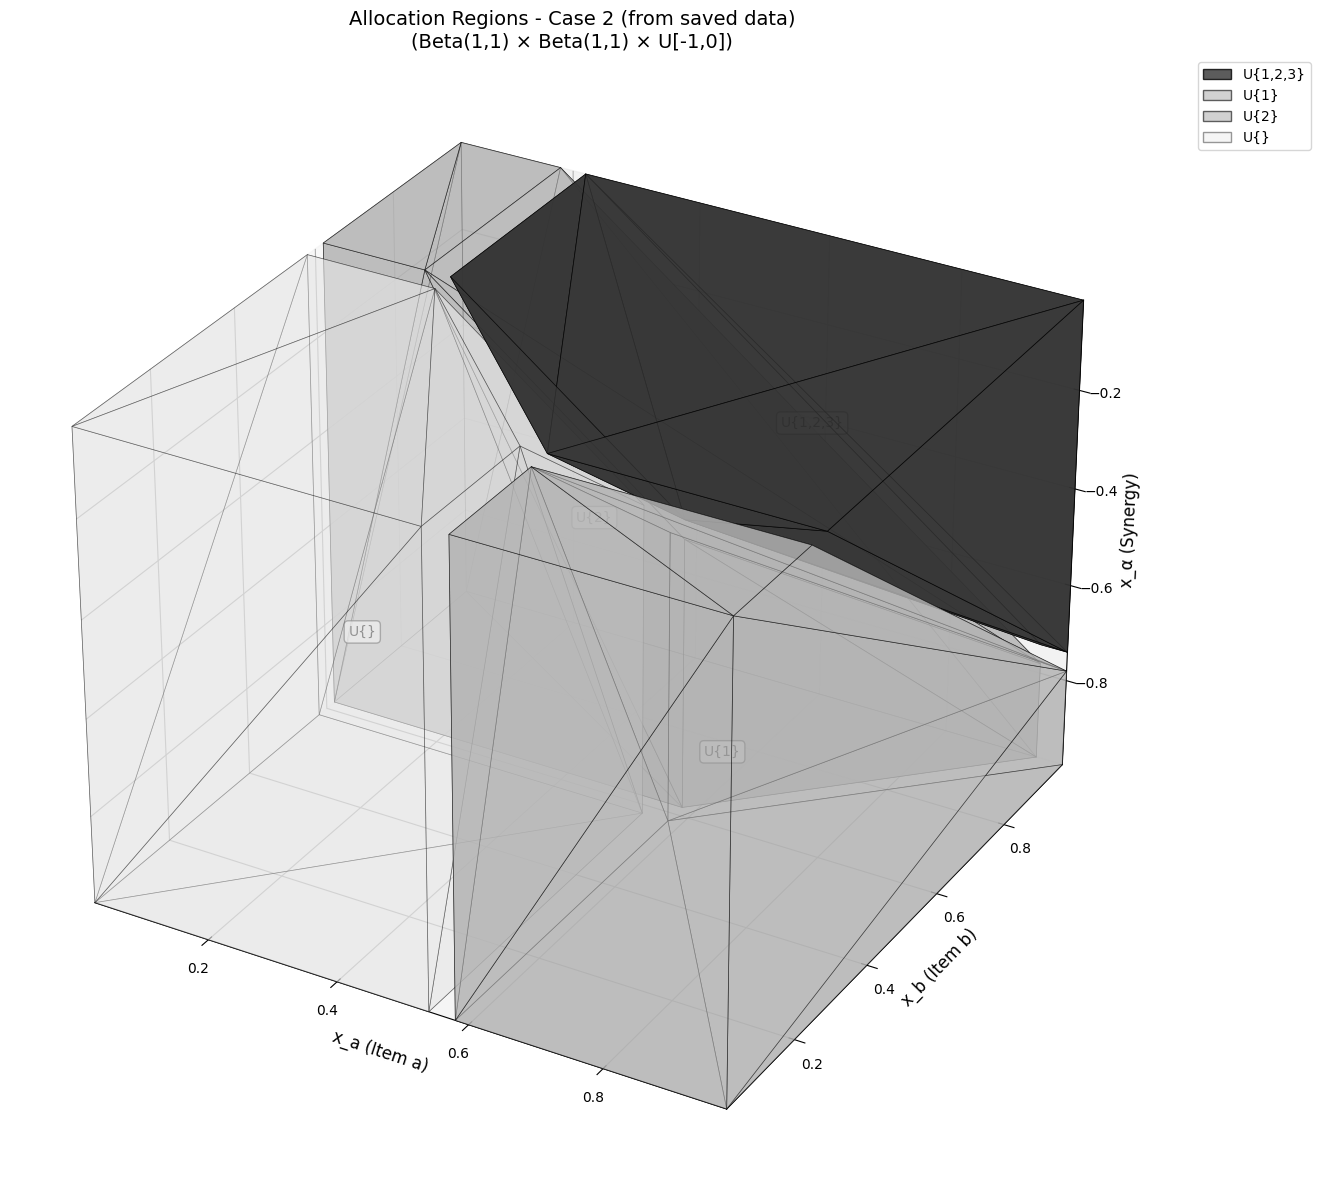

領域の統計:
  U{1,2,3}: 2495 点
  U{1}: 4290 点
  U{2}: 3710 点
  U{}: 5130 点


In [ ]:
# 保存されたデータから読み込んで可視化
data = load_results("data/results_case4.npz")
plot_polyhedral_regions(
    data['points'], data['p_sol'], data['p_sol'][2, :],
    title="Allocation Regions - Case 4 (from saved data)\n(Beta(1,1) × Beta(1,1) × U[0,0.5])"
)


# ケース5

In [ ]:
# ケース5: 財a, 財bはBeta(1,1)、シナジーαはU[-0.5,0]
NX5, NY5, NZ5 = 30, 30, 15
BETA_PARAMS_MIXED = [
    {'type': 'beta', 'params': (1.0, 1.0), 'range': (0, 1)},
    {'type': 'beta', 'params': (1.0, 1.0), 'range': (0, 1)},
    {'type': 'uniform', 'range': (-0.5, 0)},
]

In [ ]:
points5, weights5 = make_tensor_grid_3d(NX5, NY5, NZ5, BETA_PARAMS_MIXED)
print(f"#types = {len(points5)}")
print("ex. first point, weight =", points5[0], weights5[0])

status5, obj_val5, u_sol5, p_sol5, n_iter5 = solve_mechanism_iterative(
    points5, weights5, grid_sizes=(NX5, NY5, NZ5), solver=SOLVER
)

print("LP status:", status5)
print("Optimal revenue:", obj_val5)
print(f"Number of iterations: {n_iter5}")

# 結果を保存
filepath_case5 = save_results(
    points5, weights5, u_sol5, p_sol5, obj_val5, status5,
    grid_sizes=(NX5, NY5, NZ5),
    n_iter=n_iter5,
    filename="results_case5.npz"
)

#types = 31250
ex. first point, weight = (0.02, 0.02, -0.98) 3.2e-05
Gurobi Optimizer version 13.0.0 build v13.0.0rc1 (mac64[arm] - Darwin 25.1.0 25B78)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Academic license 2749041 - for non-commercial use only - registered to ko___@u.northwestern.edu
Optimize a model with 411875 rows, 187500 columns and 1141875 nonzeros (Max)
Model has 187500 linear objective coefficients
Coefficient statistics:
  Matrix range     [4e-02, 1e+00]
  Objective range  [6e-07, 6e-05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
LP warm-start: use basis

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.1368685e+00   1.862500e+04   0.000000e+00      0s
   58341    1.7151270e+00   1.401427e+05   0.000000e+00      5s
   74712    1.6519449e+00   8.280197e+06   0.000000e+00     10s
   81800    1.6336545e+00   1.130176e+06   0.000000e+00     15s
   87044    1.6227160e+

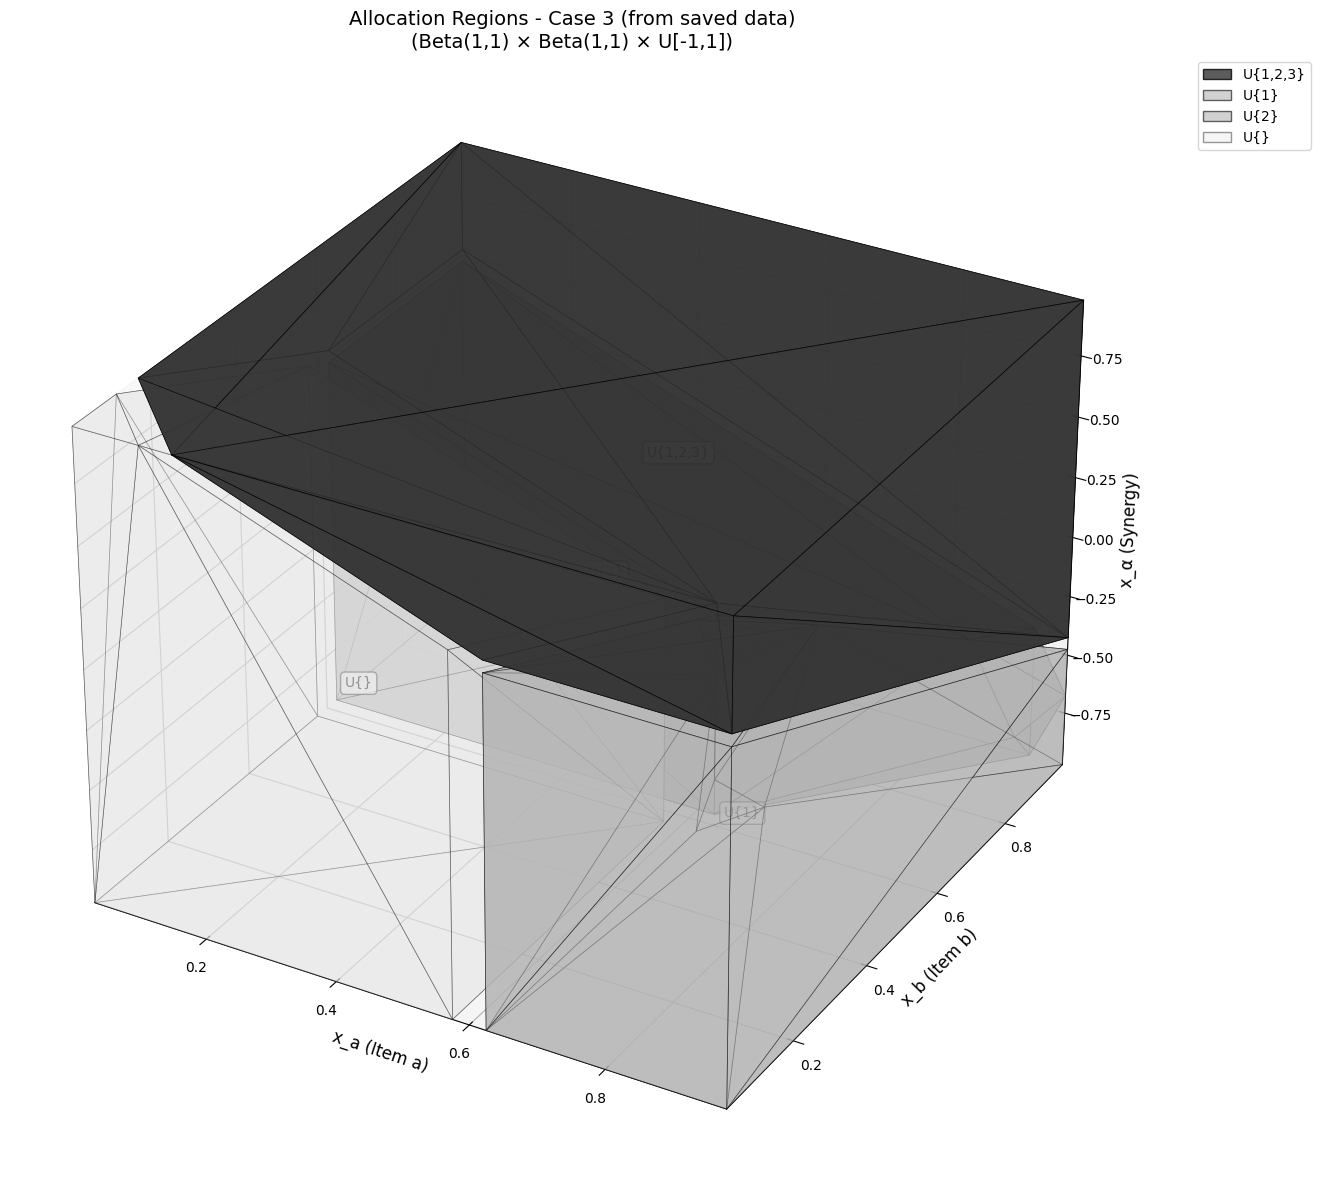

領域の統計:
  U{1,2,3}: 5824 点
  U{1}: 2885 点
  U{2}: 2831 点
  U{}: 4460 点


In [ ]:
# 保存されたデータから読み込んで可視化
data = load_results("data/results_case5.npz")
plot_polyhedral_regions(
    data['points'], data['p_sol'], data['p_sol'][2, :],
    title="Allocation Regions - Case 5 (from saved data)\n(Beta(1,1) × Beta(1,1) × U[-0.5,0])"
)


#types = 13500
ex. first point, weight = (0.016666666666666666, 0.016666666666666666, 0.016666666666666666) 7.407407407407407e-05
Gurobi Optimizer version 13.0.0 build v13.0.0rc1 (mac64[arm] - Darwin 25.1.0 25B78)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Academic license 2749041 - for non-commercial use only - registered to ko___@u.northwestern.edu
Optimize a model with 235800 rows, 108000 columns and 653400 nonzeros (Max)
Model fingerprint: 0xbe9fb85a
Model has 108000 linear objective coefficients
Coefficient statistics:
  Matrix range     [3e-02, 1e+00]
  Objective range  [1e-06, 7e-05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 14 rows and 0 columns
Presolve time: 0.15s
Presolved: 235786 rows, 108000 columns, 653470 nonzeros

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Ordering time: 0.56s

Barrier statistics:
 AA' NZ     : 1.972e+05


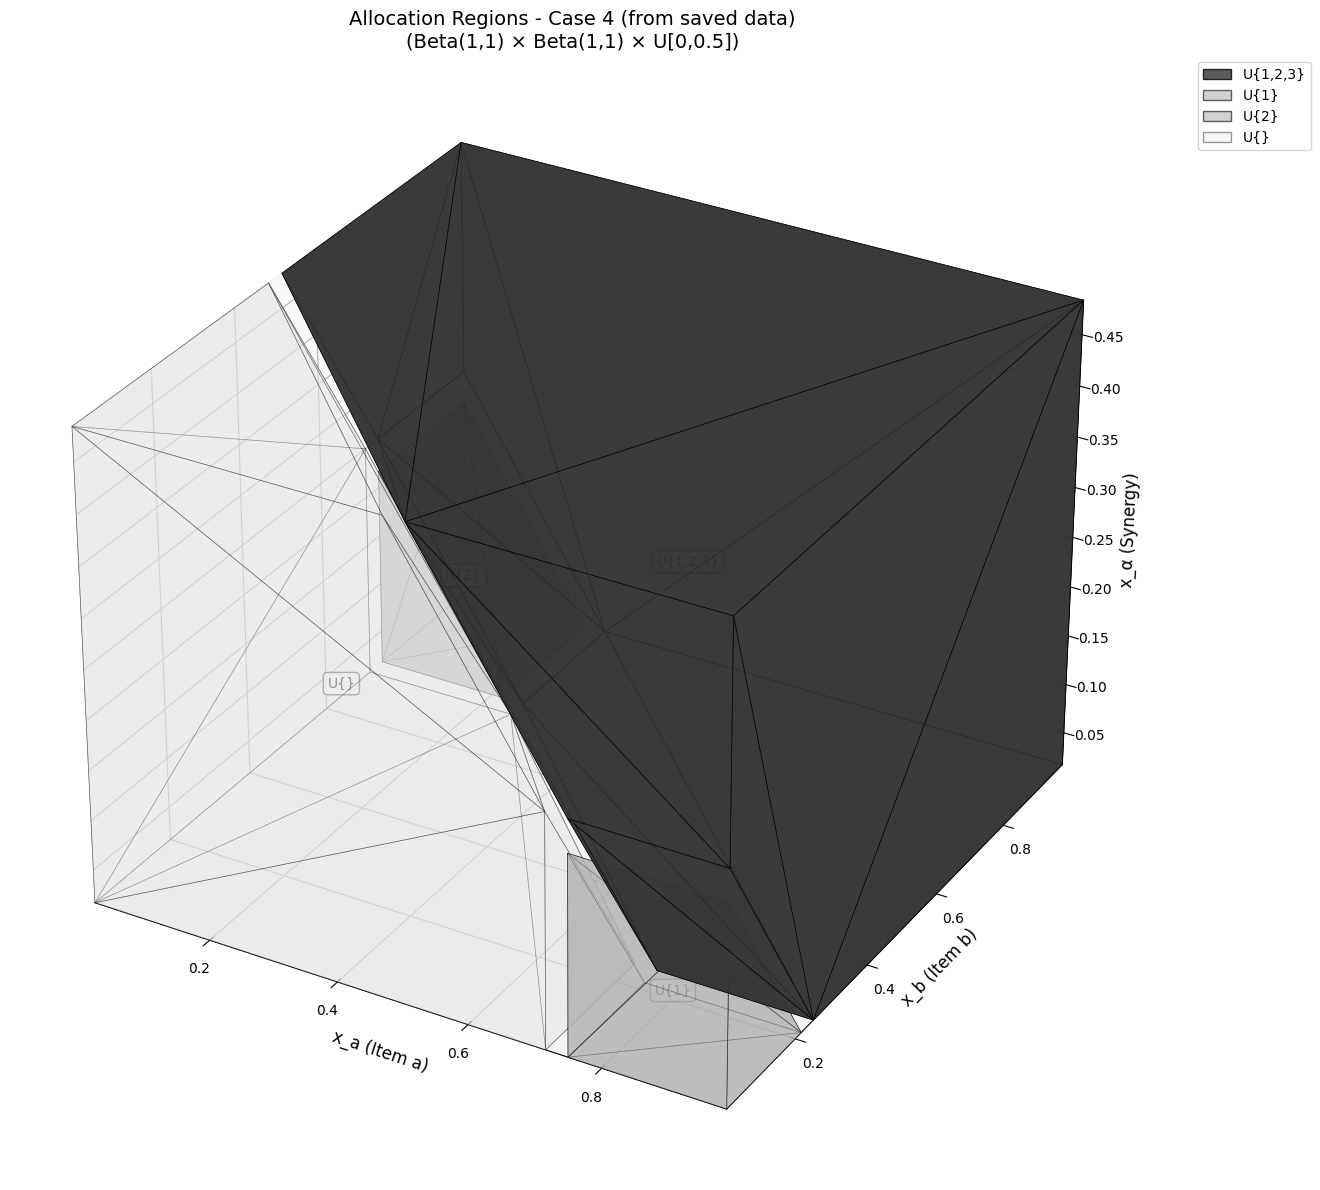

領域の統計:
  U{1,2,3}: 9285 点
  U{1}: 224 点
  U{2}: 224 点
  U{}: 3767 点


#types = 13500
ex. first point, weight = (0.016666666666666666, 0.016666666666666666, -0.48333333333333334) 7.407407407407407e-05
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2749041
Academic license 2749041 - for non-commercial use only - registered to ko___@u.northwestern.edu
Gurobi Optimizer version 13.0.0 build v13.0.0rc1 (mac64[arm] - Darwin 25.1.0 25B78)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Academic license 2749041 - for non-commercial use only - registered to ko___@u.northwestern.edu
Optimize a model with 117900 rows, 54000 columns and 326700 nonzeros (Max)
Model fingerprint: 0x2cd8bf76
Model has 54000 linear objective coefficients
Coefficient statistics:
  Matrix range     [3e-02, 1e+00]
  Objective range  [1e-06, 7e-05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 7 rows and 0 columns
Presolve time: 0.08s
Presolved: 117893 rows, 54000 colum

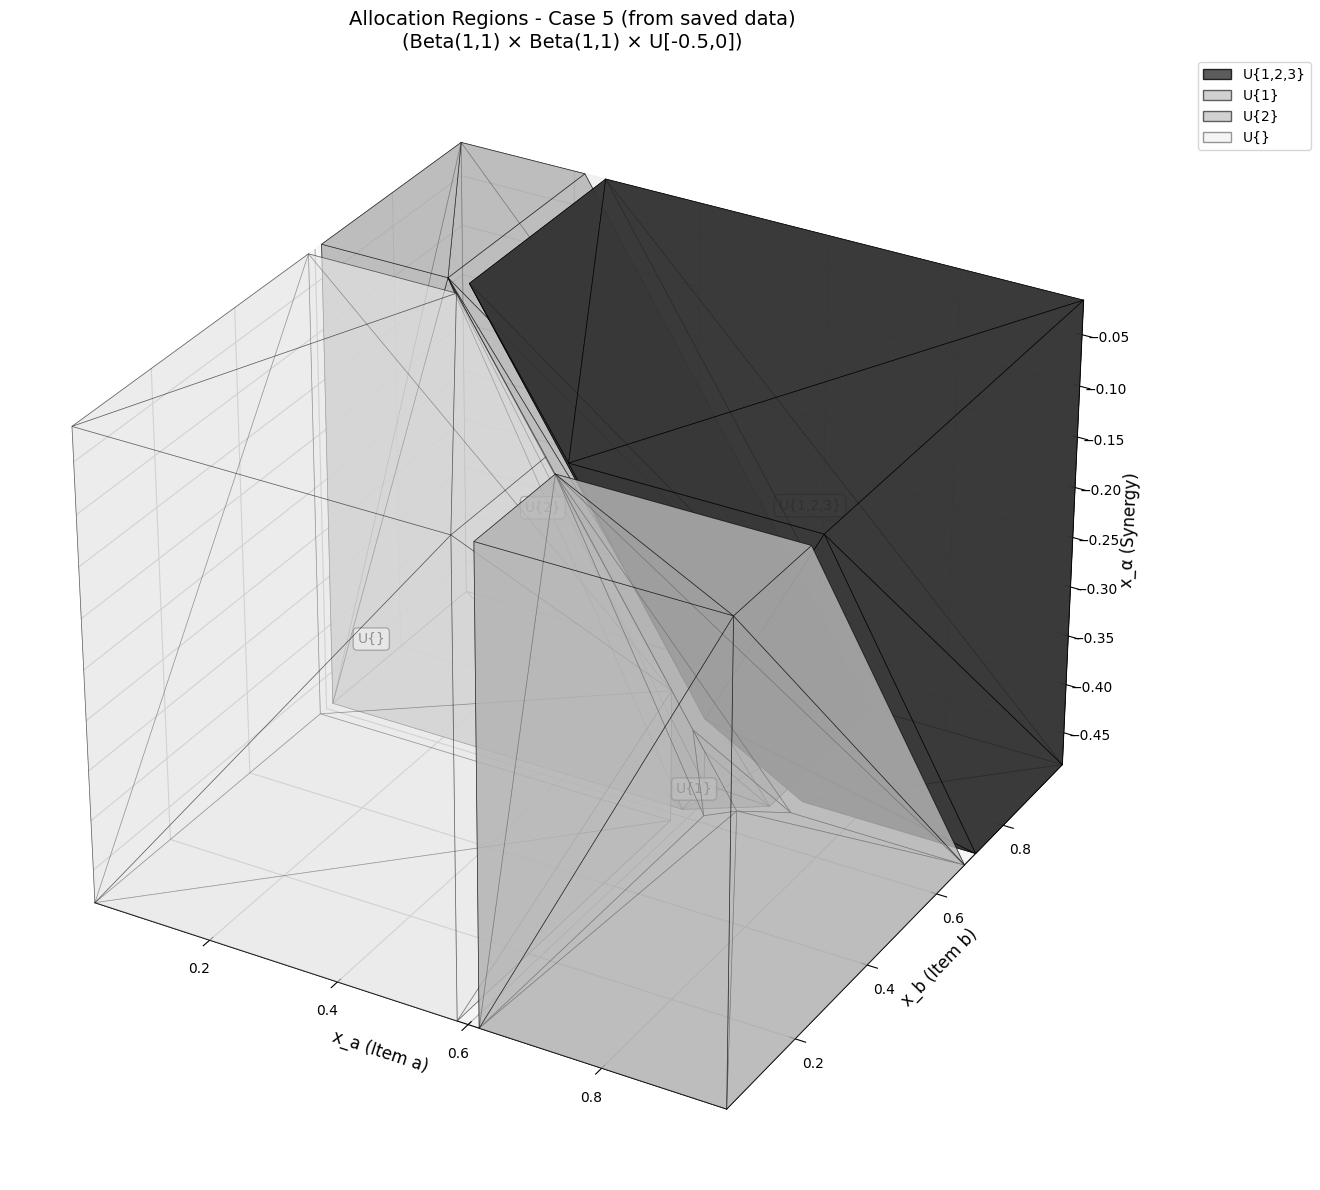

領域の統計:
  U{1,2,3}: 3834 点
  U{1}: 2512 点
  U{2}: 2514 点
  U{}: 4640 点


# ケース8


In [ ]:
# ケース8: 財a, 財bはU[1,2]、シナジーαはU[0,1]
NX8, NY8, NZ8 = 30, 30, 30
BETA_PARAMS_MIXED = [
    {'type': 'uniform', 'range': (1, 2)},
    {'type': 'uniform', 'range': (1, 2)},
    {'type': 'uniform', 'range': (0, 1)},
]


In [ ]:
points8, weights8 = make_tensor_grid_3d(NX8, NY8, NZ8, BETA_PARAMS_MIXED)
print(f"#types = {len(points8)}")
print("ex. first point, weight =", points8[0], weights8[0])

status8, obj_val8, u_sol8, p_sol8, n_iter8 = solve_mechanism_iterative(
    points8, weights8, grid_sizes=(NX8, NY8, NZ8), solver=SOLVER
)

print("LP status:", status8)
print("Optimal revenue:", obj_val8)
print(f"Number of iterations: {n_iter8}")

# 結果を保存
filepath_case8 = save_results(
    points8, weights8, u_sol8, p_sol8, obj_val8, status8,
    grid_sizes=(NX8, NY8, NZ8),
    n_iter=n_iter8,
    filename="results_case8.npz"
)


#types = 10368
ex. first point, weight = (0.020833333333333332, 0.020833333333333332, -0.7291666666666666) 9.645061728395061e-05
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2749041
Academic license 2749041 - for non-commercial use only - registered to ko___@u.northwestern.edu
Gurobi Optimizer version 13.0.0 build v13.0.0rc1 (mac64[arm] - Darwin 25.1.0 25B78)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Academic license 2749041 - for non-commercial use only - registered to ko___@u.northwestern.edu
Optimize a model with 90432 rows, 41472 columns and 250560 nonzeros (Max)
Model fingerprint: 0x956bc251
Model has 41472 linear objective coefficients
Coefficient statistics:
  Matrix range     [4e-02, 1e+00]
  Objective range  [2e-06, 1e-04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 7 rows and 0 columns
Presolve time: 0.06s
Presolved: 90425 rows, 41472 columns,

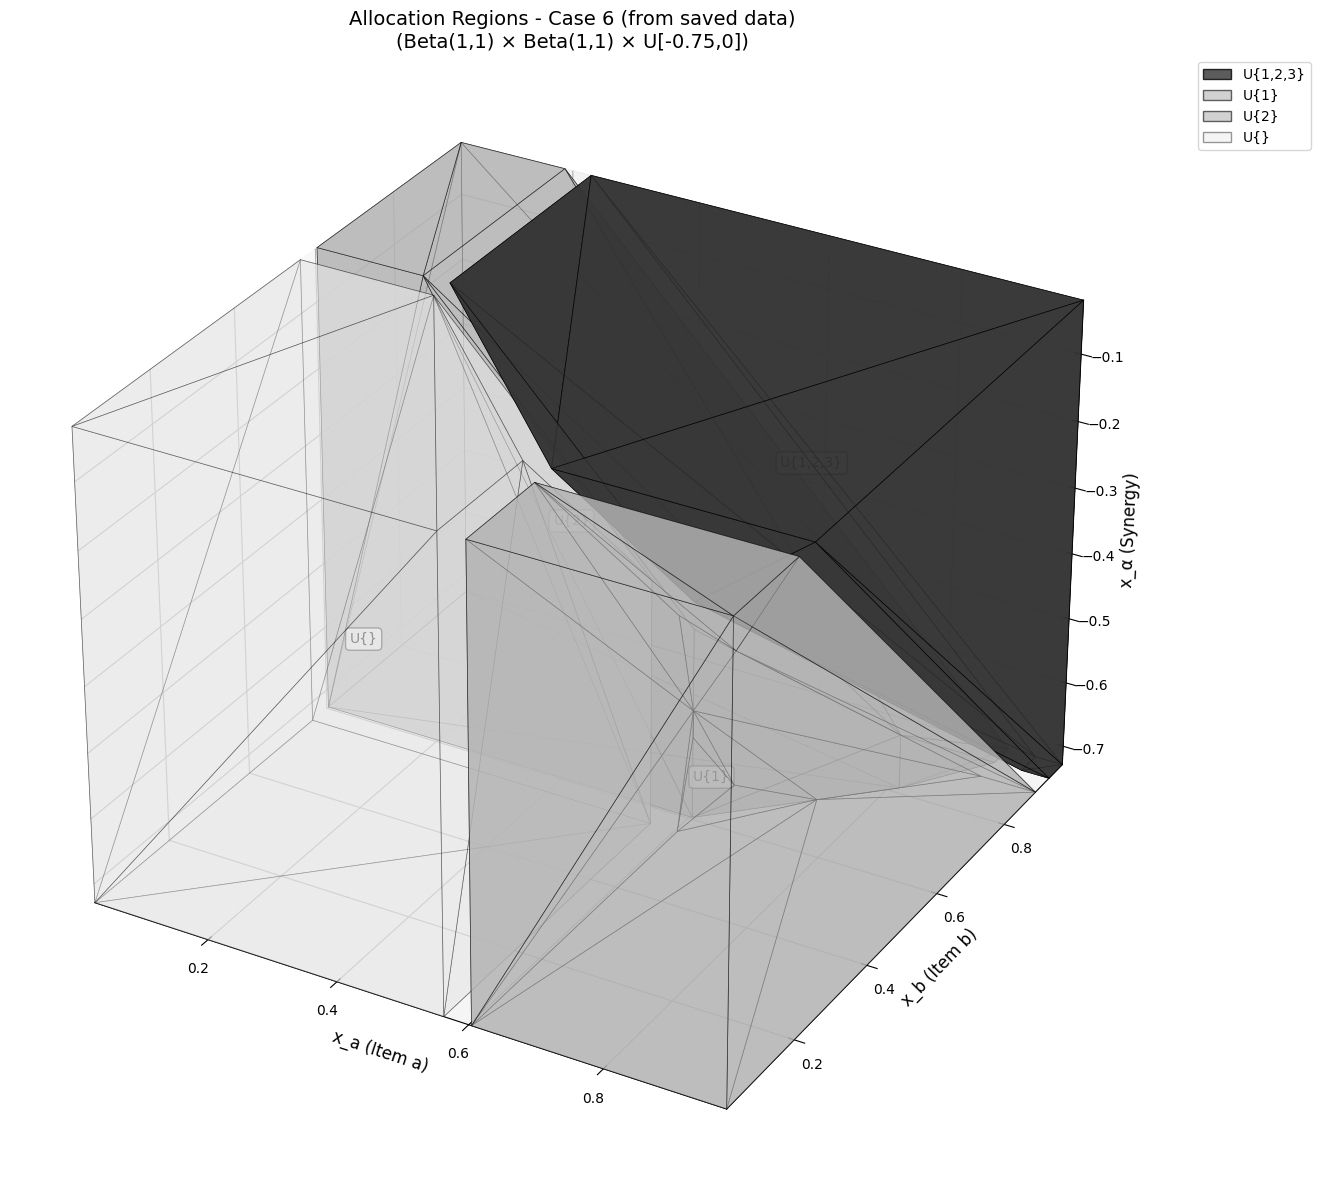

領域の統計:
  U{1,2,3}: 2304 点
  U{1}: 2329 点
  U{2}: 2327 点
  U{}: 3408 点


In [ ]:
# 保存されたデータから読み込んで可視化
data = load_results("data/results_case8.npz")
plot_polyhedral_regions(
    data['points'], data['p_sol'], data['p_sol'][2, :],
    title="Allocation Regions - Case 8 (from saved data)\n(U[1,2] × U[1,2] × U[0,1])"
)


# ケース9


In [ ]:
# ケース9: 財a, 財bはU[0,1]、シナジーαはU[0,2]
NX9, NY9, NZ9 = 30, 30, 30
BETA_PARAMS_MIXED = [
    {'type': 'uniform', 'range': (0, 1)},
    {'type': 'uniform', 'range': (0.3, 1.3)},
    {'type': 'uniform', 'range': (0.3, 1.3)},
]


In [ ]:
points9, weights9 = make_tensor_grid_3d(NX9, NY9, NZ9, BETA_PARAMS_MIXED)
print(f"#types = {len(points9)}")
print("ex. first point, weight =", points9[0], weights9[0])

status9, obj_val9, u_sol9, p_sol9, n_iter9 = solve_mechanism_iterative(
    points9, weights9, grid_sizes=(NX9, NY9, NZ9), solver=SOLVER
)

print("LP status:", status9)
print("Optimal revenue:", obj_val9)
print(f"Number of iterations: {n_iter9}")

# 結果を保存
filepath_case9 = save_results(
    points9, weights9, u_sol9, p_sol9, obj_val9, status9,
    grid_sizes=(NX9, NY9, NZ9),
    n_iter=n_iter9,
    filename="results_case9.npz"
)


#types = 10368
ex. first point, weight = (0.020833333333333332, 0.020833333333333332, 0.020833333333333332) 9.645061728395061e-05
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2749041
Academic license 2749041 - for non-commercial use only - registered to ko___@u.northwestern.edu
Gurobi Optimizer version 13.0.0 build v13.0.0rc1 (mac64[arm] - Darwin 25.1.0 25B78)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Academic license 2749041 - for non-commercial use only - registered to ko___@u.northwestern.edu
Optimize a model with 90432 rows, 41472 columns and 250560 nonzeros (Max)
Model fingerprint: 0x69a38676
Model has 41472 linear objective coefficients
Coefficient statistics:
  Matrix range     [4e-02, 1e+00]
  Objective range  [2e-06, 1e-04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 7 rows and 0 columns
Presolve time: 0.05s
Presolved: 90425 rows, 41472 columns

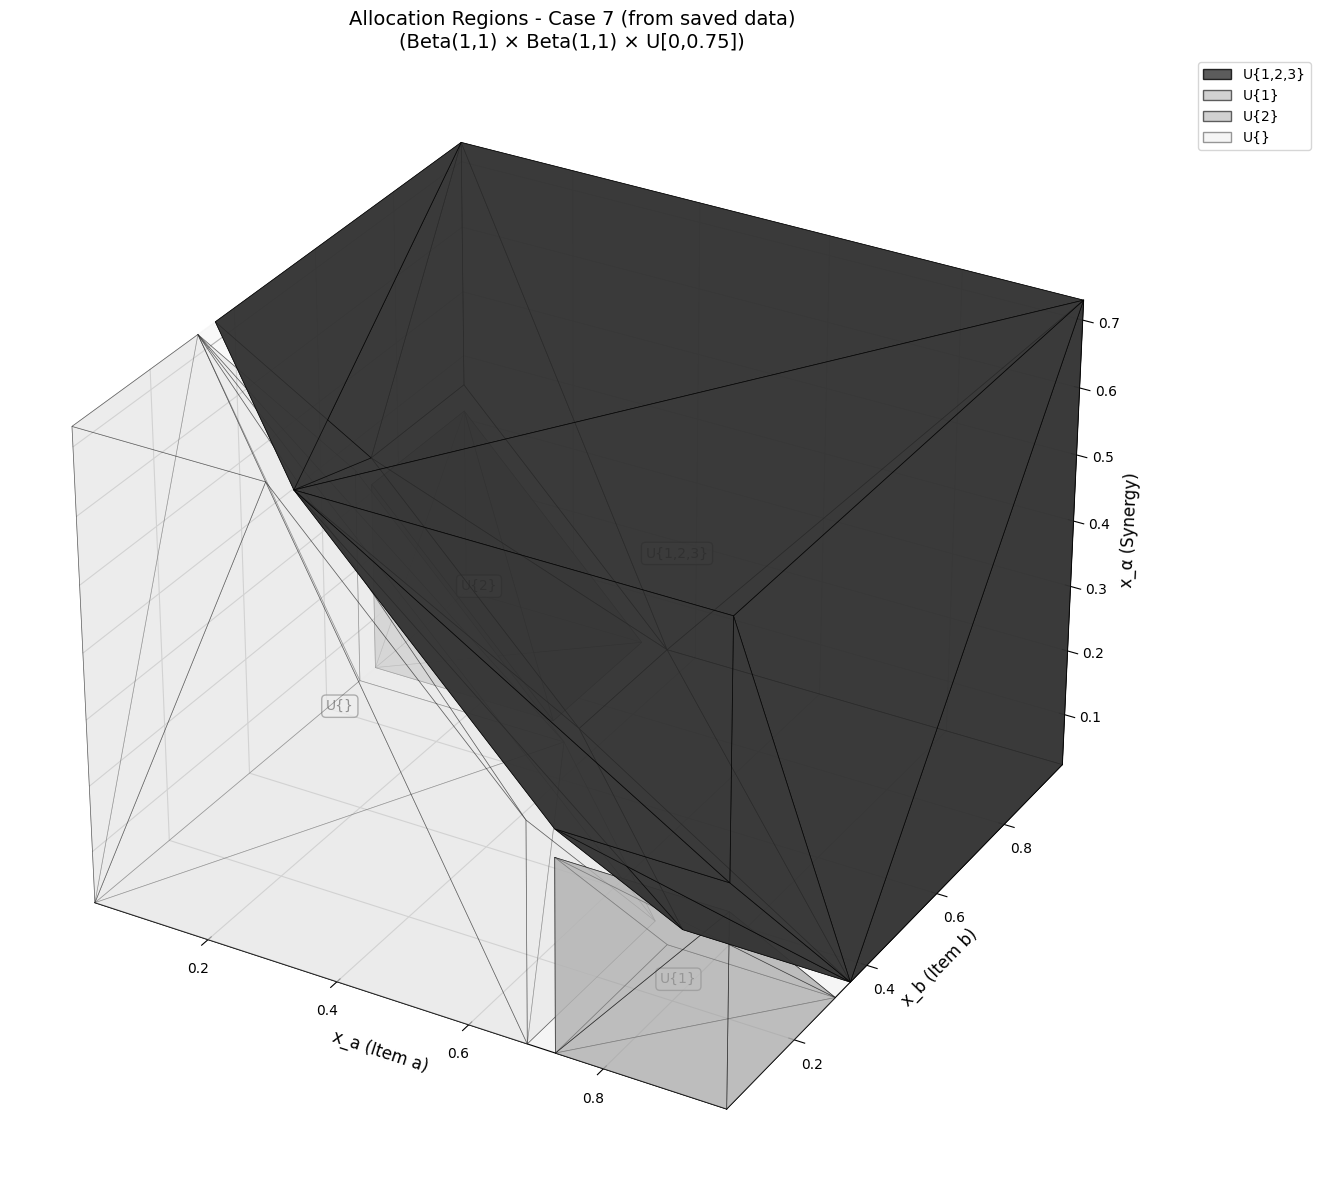

領域の統計:
  U{1,2,3}: 7263 点
  U{1}: 252 点
  U{2}: 252 点
  U{}: 2601 点


In [ ]:
# 保存されたデータから読み込んで可視化
data = load_results("data/results_case9.npz")
plot_polyhedral_regions(
    data['points'], data['p_sol'], data['p_sol'][2, :],
    title="Allocation Regions - Case 9 (from saved data)\n(U[0.3,1.3] × U[0.3,1.3] × U[0,1])"
)


# ケース10


#types = 15625
重みの合計: 1.000000


/var/folders/my/j3wjhgx94rscj7c09g72009c0000gn/T/ipykernel_25631/1686571669.py:36: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/my/j3wjhgx94rscj7c09g72009c0000gn/T/ipykernel_25631/1686571669.py:36: UserWarning: Glyph 12490 (\N{KATAKANA LETTER NA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/my/j3wjhgx94rscj7c09g72009c0000gn/T/ipykernel_25631/1686571669.py:36: UserWarning: Glyph 12472 (\N{KATAKANA LETTER ZI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/my/j3wjhgx94rscj7c09g72009c0000gn/T/ipykernel_25631/1686571669.py:36: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/my/j3wjhgx94rscj7c09g72009c0000gn/T/ipykernel_25631/1686571669.py:36: UserWarning: Glyph 23494 (\N{CJK UNIFIED IDEOGRAPH-5BC6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/my/j3wjhgx94rscj7c0

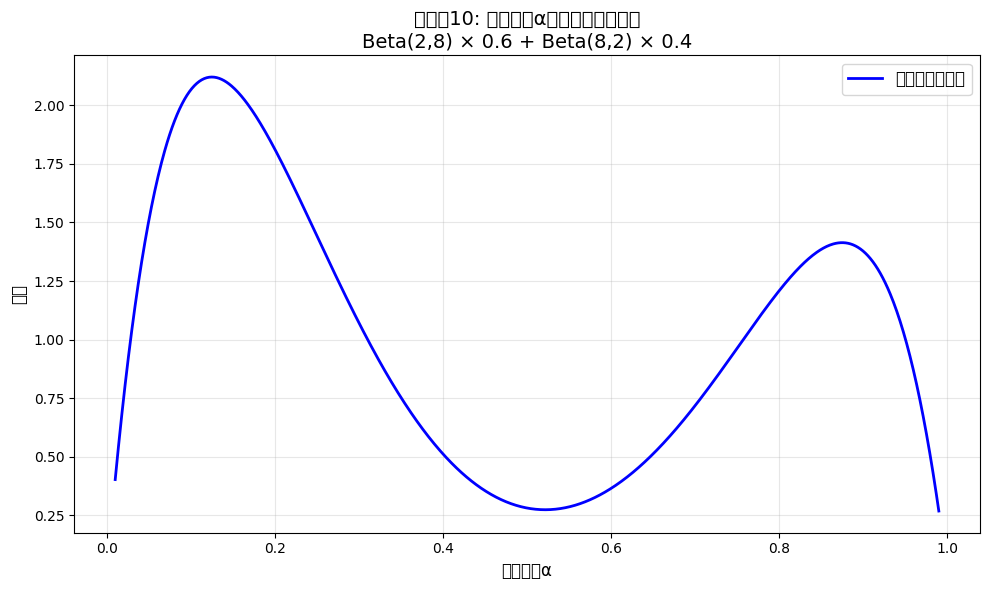

In [13]:
# ケース10（改良版）: 財a, 財bは一様分布、シナジーαは混合ベータ分布（2つの峰）
NX10, NY10, NZ10 = 25, 25, 25

# 混合ベータ分布の定義
# 2つのベータ分布を重み付きで混合
MIXTURE_BETA_PARAMS_10 = {
    'type': 'mixture_beta',
    'components': [
        {'params': (2.0, 8.0), 'weight': 0.6},  # 左側の峰（低い値に集中）
        {'params': (8.0, 2.0), 'weight': 0.4}   # 右側の峰（高い値に集中）
    ],
    'range': (0.0, 1.0)
}

BETA_PARAMS_MIXTURE_10 = [
    {'type': 'uniform', 'range': (0.3, 1.3)},  # 財a: 一様分布
    {'type': 'uniform', 'range': (0.3, 1.3)},  # 財b: 一様分布
    MIXTURE_BETA_PARAMS_10  # シナジーα: 混合ベータ分布
]

points10, weights10 = make_tensor_grid_3d(NX10, NY10, NZ10, BETA_PARAMS_MIXTURE_10)
print(f"#types = {len(points10)}")
print(f"重みの合計: {sum(weights10):.6f}")

# 混合分布の可視化（オプション）
z_values = np.linspace(0.01, 0.99, 1000)
mixture_density = mixture_beta_pdf(z_values, MIXTURE_BETA_PARAMS_10['components'], 0.0, 1.0)

plt.figure(figsize=(10, 6))
plt.plot(z_values, mixture_density, 'b-', linewidth=2, label='混合ベータ分布')
plt.xlabel('シナジーα', fontsize=12)
plt.ylabel('密度', fontsize=12)
plt.title('ケース10: シナジーαの混合ベータ分布\nBeta(2,8) × 0.6 + Beta(8,2) × 0.4', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


In [14]:
status10, obj_val10, u_sol10, p_sol10, n_iter10 = solve_mechanism_iterative(
    points10, weights10, grid_sizes=(NX10, NY10, NZ10), solver=SOLVER
)

print("LP status:", status10)
print("Optimal revenue:", obj_val10)
print(f"Number of iterations: {n_iter10}")

# 結果を保存
filepath_case10 = save_results(
    points10, weights10, u_sol10, p_sol10, obj_val10, status10,
    grid_sizes=(NX10, NY10, NZ10),
    n_iter=n_iter10,
    filename="results_case10.npz"
)
print(f"結果を保存しました: {filepath_case10}")


Gurobi Optimizer version 13.0.0 build v13.0.0rc1 (mac64[arm] - Darwin 25.1.0 25B78)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Academic license 2749041 - for non-commercial use only - registered to ko___@u.northwestern.edu
Optimize a model with 136875 rows, 62500 columns and 379375 nonzeros (Max)
Model fingerprint: 0x1d2728da
Model has 62500 linear objective coefficients
Coefficient statistics:
  Matrix range     [4e-02, 1e+00]
  Objective range  [1e-06, 2e-04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 7 rows and 0 columns
Presolve time: 0.14s
Presolved: 136868 rows, 62500 columns, 379410 nonzeros

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Ordering time: 0.39s

Barrier statistics:
 AA' NZ     : 1.158e+05
 Factor NZ  : 2.796e+06 (roughly 70 MB of memory)
 Factor Ops : 1.383e+09 (less than 1 second per iteration)
 Threads    : 6

        

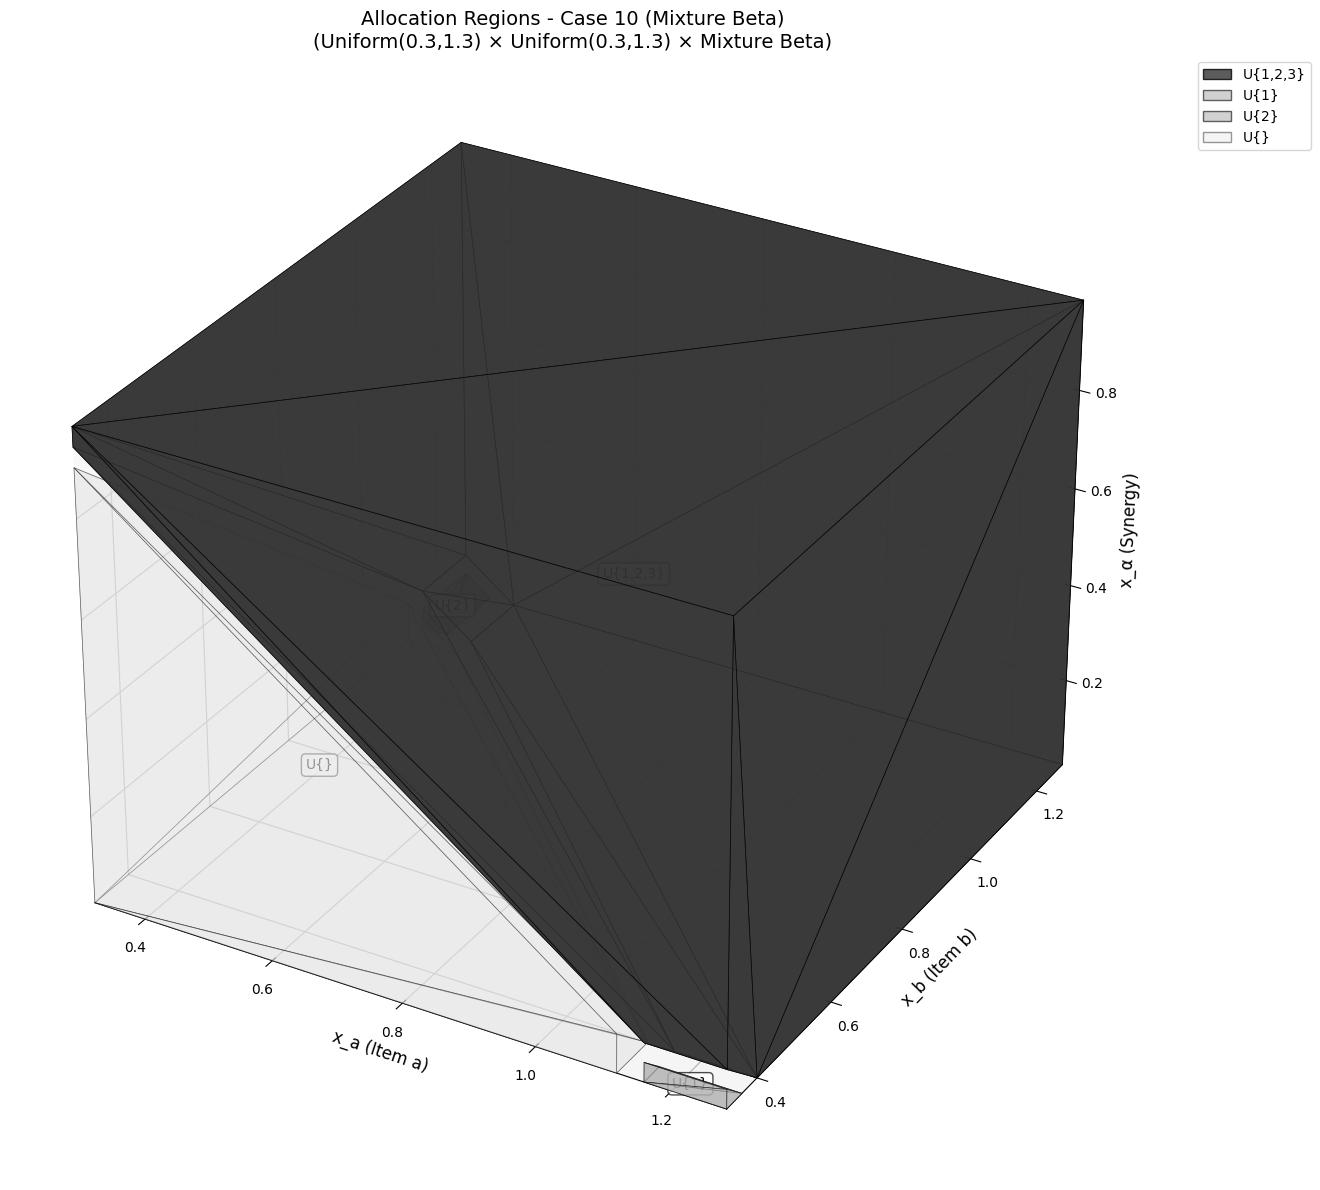

領域の統計:
  U{1,2,3}: 13309 点
  U{1}: 12 点
  U{2}: 12 点
  U{}: 2292 点


In [15]:
# 保存されたデータから読み込んで可視化
data_case10 = load_results("data/results_case10.npz")
plot_polyhedral_regions(
    data_case10['points'], data_case10['p_sol'], data_case10['p_sol'][2, :],
    title="Allocation Regions - Case 10 (Mixture Beta)\n(Uniform(0.3,1.3) × Uniform(0.3,1.3) × Mixture Beta)"
)


# ケース11


#types = 15625
重みの合計: 1.000000


/var/folders/my/j3wjhgx94rscj7c09g72009c0000gn/T/ipykernel_25631/1040105871.py:37: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/my/j3wjhgx94rscj7c09g72009c0000gn/T/ipykernel_25631/1040105871.py:37: UserWarning: Glyph 12490 (\N{KATAKANA LETTER NA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/my/j3wjhgx94rscj7c09g72009c0000gn/T/ipykernel_25631/1040105871.py:37: UserWarning: Glyph 12472 (\N{KATAKANA LETTER ZI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/my/j3wjhgx94rscj7c09g72009c0000gn/T/ipykernel_25631/1040105871.py:37: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/my/j3wjhgx94rscj7c09g72009c0000gn/T/ipykernel_25631/1040105871.py:37: UserWarning: Glyph 23494 (\N{CJK UNIFIED IDEOGRAPH-5BC6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/my/j3wjhgx94rscj7c0

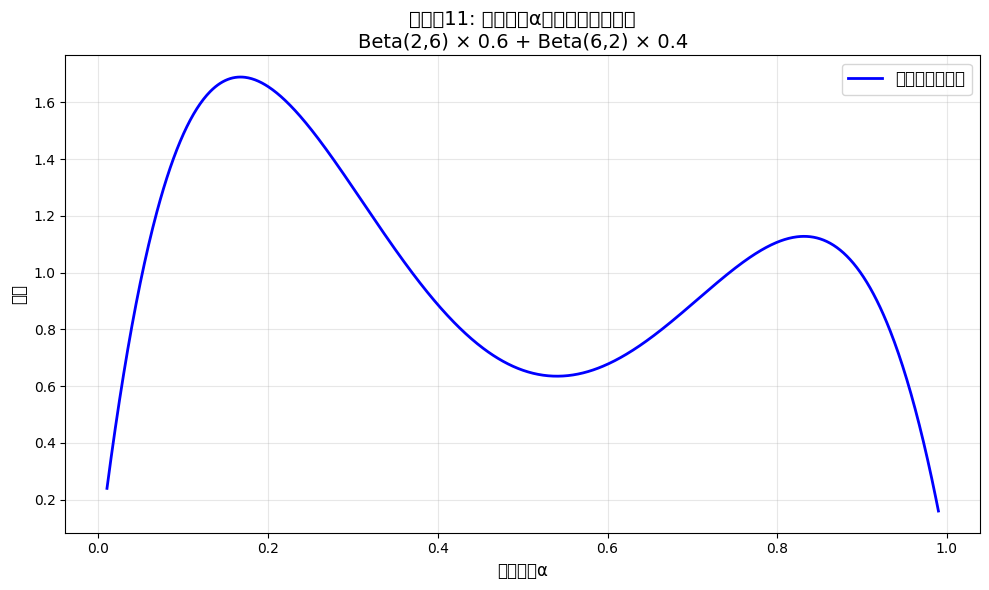

In [18]:
# ケース11（改良版）: 財a, 財bは一様分布、シナジーαは混合ベータ分布（2つの峰）
# パラメータ変更: (2,8) → (2,6), (8,2) → (6,2), 一様分布の範囲: (0.3,1.3) → (0.0,1.0)
NX11, NY11, NZ11 = 25, 25, 25

# 混合ベータ分布の定義
# 2つのベータ分布を重み付きで混合
MIXTURE_BETA_PARAMS_11 = {
    'type': 'mixture_beta',
    'components': [
        {'params': (2.0, 6.0), 'weight': 0.6},  # 左側の峰（低い値に集中）
        {'params': (6.0, 2.0), 'weight': 0.4}   # 右側の峰（高い値に集中）
    ],
    'range': (0.0, 1.0)
}

BETA_PARAMS_MIXTURE_11 = [
    {'type': 'uniform', 'range': (0.0, 1.0)},  # 財a: 一様分布
    {'type': 'uniform', 'range': (0.0, 1.0)},  # 財b: 一様分布
    MIXTURE_BETA_PARAMS_11  # シナジーα: 混合ベータ分布
]

points11, weights11 = make_tensor_grid_3d(NX11, NY11, NZ11, BETA_PARAMS_MIXTURE_11)
print(f"#types = {len(points11)}")
print(f"重みの合計: {sum(weights11):.6f}")

# 混合分布の可視化（オプション）
z_values = np.linspace(0.01, 0.99, 1000)
mixture_density = mixture_beta_pdf(z_values, MIXTURE_BETA_PARAMS_11['components'], 0.0, 1.0)

plt.figure(figsize=(10, 6))
plt.plot(z_values, mixture_density, 'b-', linewidth=2, label='混合ベータ分布')
plt.xlabel('シナジーα', fontsize=12)
plt.ylabel('密度', fontsize=12)
plt.title('ケース11: シナジーαの混合ベータ分布\nBeta(2,6) × 0.6 + Beta(6,2) × 0.4', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


In [19]:
status11, obj_val11, u_sol11, p_sol11, n_iter11 = solve_mechanism_iterative(
    points11, weights11, grid_sizes=(NX11, NY11, NZ11), solver=SOLVER
)

print("LP status:", status11)
print("Optimal revenue:", obj_val11)
print(f"Number of iterations: {n_iter11}")

# 結果を保存
filepath_case11 = save_results(
    points11, weights11, u_sol11, p_sol11, obj_val11, status11,
    grid_sizes=(NX11, NY11, NZ11),
    n_iter=n_iter11,
    filename="results_case11.npz"
)
print(f"結果を保存しました: {filepath_case11}")


Gurobi Optimizer version 13.0.0 build v13.0.0rc1 (mac64[arm] - Darwin 25.1.0 25B78)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Academic license 2749041 - for non-commercial use only - registered to ko___@u.northwestern.edu
Optimize a model with 136875 rows, 62500 columns and 379375 nonzeros (Max)
Model fingerprint: 0x02e745d7
Model has 62500 linear objective coefficients
Coefficient statistics:
  Matrix range     [4e-02, 1e+00]
  Objective range  [4e-07, 1e-04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 7 rows and 0 columns
Presolve time: 0.13s
Presolved: 136868 rows, 62500 columns, 379410 nonzeros

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Ordering time: 0.45s

Barrier statistics:
 AA' NZ     : 1.157e+05
 Factor NZ  : 2.711e+06 (roughly 70 MB of memory)
 Factor Ops : 1.320e+09 (less than 1 second per iteration)
 Threads    : 6

        

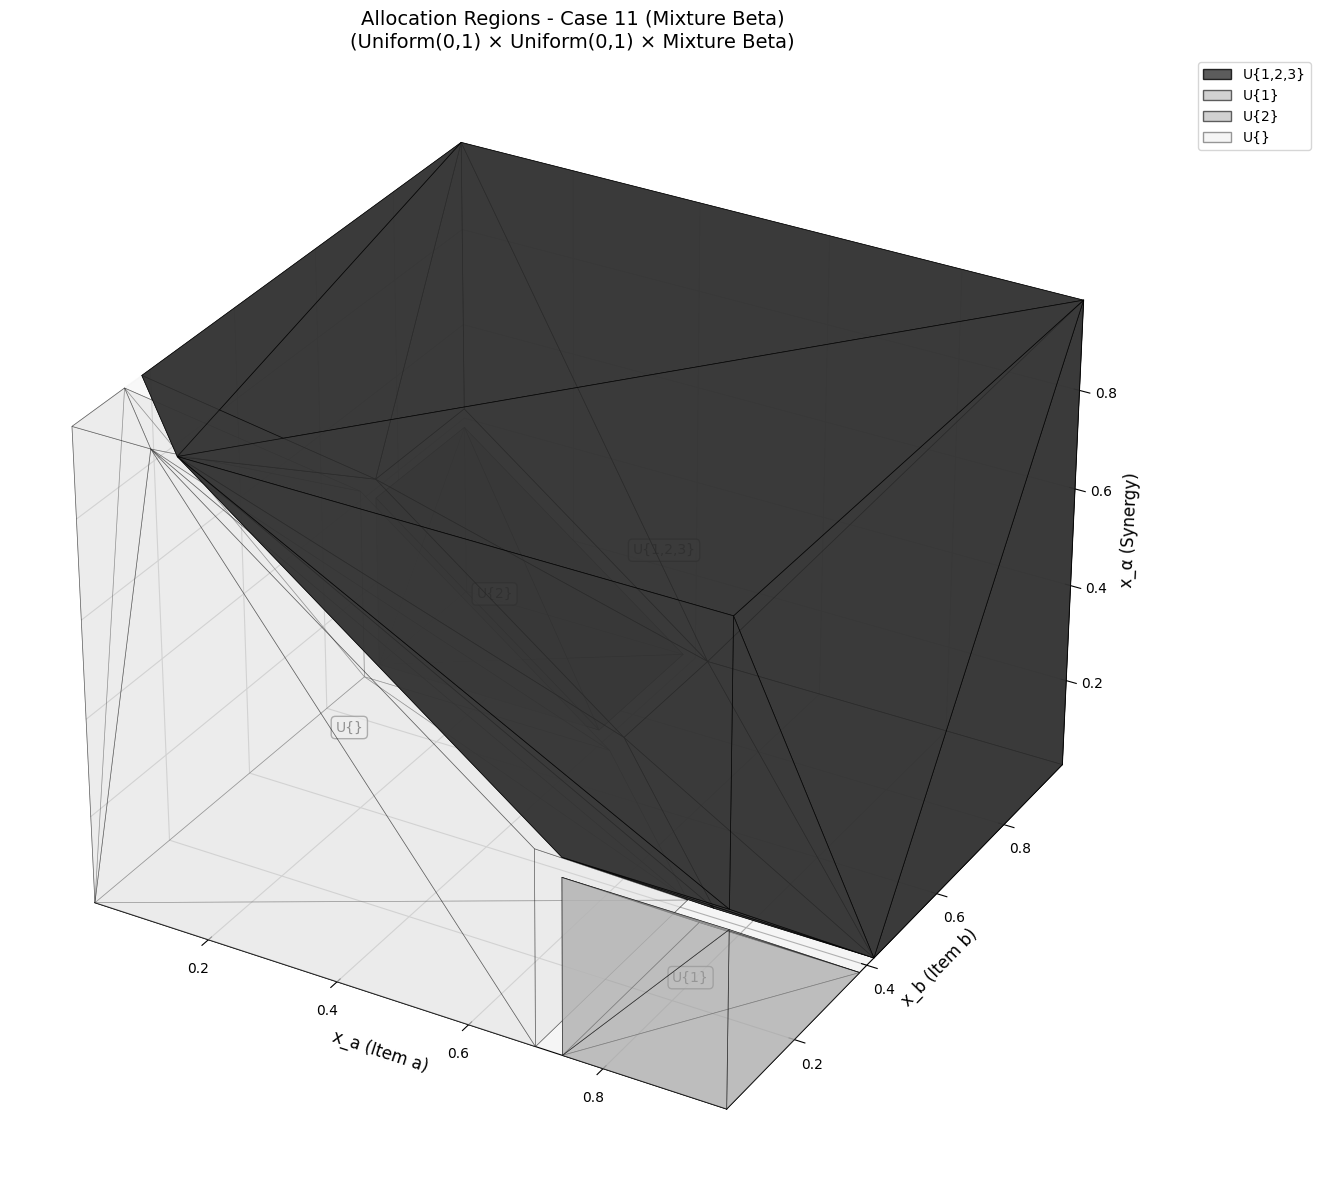

領域の統計:
  U{1,2,3}: 11245 点
  U{1}: 385 点
  U{2}: 385 点
  U{}: 3610 点


In [20]:
# 保存されたデータから読み込んで可視化
data_case11 = load_results("data/results_case11.npz")
plot_polyhedral_regions(
    data_case11['points'], data_case11['p_sol'], data_case11['p_sol'][2, :],
    title="Allocation Regions - Case 11 (Mixture Beta)\n(Uniform(0,1) × Uniform(0,1) × Mixture Beta)"
)